# Kaggle Students' Academic Performance Dataset Analysis

# Data

## General

- Data Set Characteristics: Multivariate

- Number of Instances: 480

- Area: E-learning, Education, Predictive models, Educational Data Mining

- Attribute Characteristics: Integer/Categorical

- Number of Attributes: 16

## Features

#### - Gender
  - student's gender (nominal: 'Male' or 'Female’)

#### - Nationality 
  - student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

#### - Place of birth 
  - student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

#### - Educational Stages
  - educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

#### - Grade Levels
  - grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

#### - Section ID
  - classroom student belongs (nominal:’A’,’B’,’C’)

#### - Topic
  - course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

#### - Semester
  - school year semester (nominal:’ First’,’ Second’)

#### - Parent responsible for student (nominal:’mom’,’father’)

#### - Raised hand
  - how many times the student raises his/her hand on classroom (numeric:0-100)

#### - Visited resources
  - how many times the student visits a course content(numeric:0-100)

#### - Viewing announcements
  - how many times the student checks the new announcements(numeric:0-100)

#### - Discussion groups
  - how many times the student participate on discussion groups (numeric:0-100)

#### - Parent Answering Survey
  - parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

#### - Parent School Satisfaction
  - the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

#### - Student Absence Days
  - the number of absence days for each student (nominal: above-7, under-7)

## Target

The students are classified into three numerical intervals based on their total grade/mark:

- Low-Level: interval includes values from 0 to 69,

- Middle-Level: interval includes values from 70 to 89,

- High-Level: interval includes values from 90-100.

## Loading Data and Importing Modules & Libs

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# # Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv('edu-data.csv')

data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


## Fixing weird feature labels

Some feature labels have inconsistent lower or upper case letters. Let's fix this for the sake of convenience

In [4]:
data.columns.values

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [5]:
# changing weird column names to appropriate ones

data.columns = ['Gender','Nationality','Birth Place','Edu Stage','Grade Level','Classroom',
                      'Topic','Semester','Responsible Parent','Raised Hands','Visited Resources','Viewed Announcements',
                      'Discussion','Parent Answ survey','Parent School Satisf','Student Absence Days','Class']

In [6]:
# checking!
data.columns.values

array(['Gender', 'Nationality', 'Birth Place', 'Edu Stage', 'Grade Level',
       'Classroom', 'Topic', 'Semester', 'Responsible Parent',
       'Raised Hands', 'Visited Resources', 'Viewed Announcements',
       'Discussion', 'Parent Answ survey', 'Parent School Satisf',
       'Student Absence Days', 'Class'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
Gender                  480 non-null object
Nationality             480 non-null object
Birth Place             480 non-null object
Edu Stage               480 non-null object
Grade Level             480 non-null object
Classroom               480 non-null object
Topic                   480 non-null object
Semester                480 non-null object
Responsible Parent      480 non-null object
Raised Hands            480 non-null int64
Visited Resources       480 non-null int64
Viewed Announcements    480 non-null int64
Discussion              480 non-null int64
Parent Answ survey      480 non-null object
Parent School Satisf    480 non-null object
Student Absence Days    480 non-null object
Class                   480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


## Checking values of each feature and fixing weird representations

In [8]:
data.Gender.value_counts()

M    305
F    175
Name: Gender, dtype: int64

In [9]:
data.Nationality.value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
USA              6
Lybia            6
Morocco          4
venzuela         1
Name: Nationality, dtype: int64

In [10]:
data['Nationality'] = data.Nationality.map({'KW':'Kuwait','Jordan':'Jordan','lebanon':'Lebanon','SaudiArabia':'Saudi Arabia', 
                                            'Palestine':'Palestine','Iraq':'Iraq','Tunis':'Tunis','Egypt':'Egypt',
                                            'Syria':'Syria','Iran':'Iran','Lybia':'Lybia','USA':'USA',
                                            'Morocco':'Morocoo','venzuela':'Venezuela'})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
Gender                  480 non-null object
Nationality             480 non-null object
Birth Place             480 non-null object
Edu Stage               480 non-null object
Grade Level             480 non-null object
Classroom               480 non-null object
Topic                   480 non-null object
Semester                480 non-null object
Responsible Parent      480 non-null object
Raised Hands            480 non-null int64
Visited Resources       480 non-null int64
Viewed Announcements    480 non-null int64
Discussion              480 non-null int64
Parent Answ survey      480 non-null object
Parent School Satisf    480 non-null object
Student Absence Days    480 non-null object
Class                   480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [12]:
data['Birth Place'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Tunis            9
Egypt            9
Syria            6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: Birth Place, dtype: int64

In [13]:
data['Birth Place'] =\
data['Birth Place'].map({'KuwaIT':'Kuwait','Jordan':'Jordan','lebanon':'Lebanon','SaudiArabia':'Saudi Arabia', 
                                            'Palestine':'Palestine','Iraq':'Iraq','Tunis':'Tunis','Egypt':'Egypt',
                                            'Syria':'Syria','Iran':'Iran','Lybia':'Lybia','USA':'USA',
                                            'Morocco':'Morocoo','venzuela':'Venezuela'})

In [14]:
data['Edu Stage'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: Edu Stage, dtype: int64

In [15]:
data['Edu Stage'] = data['Edu Stage'].map({'MiddleSchool':'MS','lowerlevel':'LS','HighSchool':'HS'})

In [16]:
data['Grade Level'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: Grade Level, dtype: int64

In [17]:
data['Classroom'].value_counts()

A    283
B    167
C     30
Name: Classroom, dtype: int64

In [18]:
data['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Geology      24
Chemistry    24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [19]:
data['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

In [20]:
data['Responsible Parent'].value_counts()

Father    283
Mum       197
Name: Responsible Parent, dtype: int64

In [21]:
data['Responsible Parent'] = data['Responsible Parent'].map({'Father':'Dad','Mum':'Mom'})

In [22]:
data['Raised Hands'].value_counts()

10     31
70     31
80     28
50     17
72     17
15     14
12     12
60     12
19     11
90     11
20     11
25     11
5      10
30      9
35      9
0       9
85      9
2       8
75      8
87      8
7       7
55      7
100     6
69      6
32      6
62      6
27      6
22      6
40      6
11      6
       ..
9       3
98      3
4       3
49      3
51      3
74      3
18      2
96      2
3       2
1       2
16      2
53      2
84      2
59      2
52      1
99      1
41      1
57      1
36      1
6       1
76      1
33      1
61      1
97      1
73      1
28      1
66      1
67      1
83      1
86      1
Name: Raised Hands, Length: 82, dtype: int64

In [23]:
data['Visited Resources'].value_counts()

80    29
90    29
82    16
88    13
12    13
10    12
87    12
70    12
92    10
20    10
2     10
89     9
75     9
7      9
15     9
81     9
98     9
50     8
97     8
60     8
9      7
5      7
51     7
0      7
79     7
84     7
21     6
17     6
91     6
8      6
      ..
58     3
44     3
41     3
33     2
96     2
93     2
11     2
19     2
99     2
27     2
39     2
29     2
26     2
59     1
1      1
38     1
68     1
66     1
63     1
78     1
43     1
28     1
24     1
57     1
55     1
54     1
36     1
16     1
18     1
48     1
Name: Visited Resources, Length: 89, dtype: int64

In [24]:
data['Viewed Announcements'].value_counts()

12    21
42    16
50    16
40    16
2     14
20    14
82    13
29    12
32    12
10    12
52    11
15    11
22    10
62    10
0     10
23    10
30     9
83     9
3      8
72     8
19     8
9      8
21     7
58     7
11     7
33     7
6      7
5      6
13     6
51     6
      ..
26     3
14     3
66     3
98     2
28     2
48     2
77     2
69     2
65     2
56     2
54     2
53     2
57     2
44     2
34     2
39     2
38     2
93     1
91     1
88     1
87     1
78     1
17     1
75     1
45     1
67     1
60     1
24     1
43     1
36     1
Name: Viewed Announcements, Length: 88, dtype: int64

In [25]:
data['Discussion'].value_counts()

70    24
40    23
33    21
50    18
30    17
10    16
80    15
14    13
53    12
20    11
23    11
90    11
43    11
13    11
11     9
83     9
89     9
19     9
3      8
12     8
21     7
17     7
60     7
66     7
29     6
22     6
39     5
7      5
41     5
28     5
      ..
75     3
46     2
93     2
63     2
97     2
69     2
36     2
94     2
71     2
92     2
55     2
4      2
77     2
91     2
88     2
74     2
99     1
32     1
45     1
57     1
58     1
59     1
62     1
64     1
65     1
73     1
76     1
82     1
95     1
48     1
Name: Discussion, Length: 90, dtype: int64

In [26]:
data['Parent Answ survey'].value_counts()

Yes    270
No     210
Name: Parent Answ survey, dtype: int64

In [27]:
data['Parent School Satisf'].value_counts()

Good    292
Bad     188
Name: Parent School Satisf, dtype: int64

In [28]:
data['Student Absence Days'].value_counts()

Under-7    289
Above-7    191
Name: Student Absence Days, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
Gender                  480 non-null object
Nationality             480 non-null object
Birth Place             480 non-null object
Edu Stage               480 non-null object
Grade Level             480 non-null object
Classroom               480 non-null object
Topic                   480 non-null object
Semester                480 non-null object
Responsible Parent      480 non-null object
Raised Hands            480 non-null int64
Visited Resources       480 non-null int64
Viewed Announcements    480 non-null int64
Discussion              480 non-null int64
Parent Answ survey      480 non-null object
Parent School Satisf    480 non-null object
Student Absence Days    480 non-null object
Class                   480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


## Exploratory Data Analysis (EDA)

Let's consider receiving a "low level" amounts to "failure" for easier exploration of data

In [30]:
data['Failed'] = np.where(data['Class']=='L',1,0)

In [31]:
categorical_features = data.select_dtypes(include=['object']).columns.values
numerical_features = data.select_dtypes(exclude=['object']).columns.values

In [32]:
categorical_features

array(['Gender', 'Nationality', 'Birth Place', 'Edu Stage', 'Grade Level',
       'Classroom', 'Topic', 'Semester', 'Responsible Parent',
       'Parent Answ survey', 'Parent School Satisf',
       'Student Absence Days', 'Class'], dtype=object)

In [33]:
numerical_features

array(['Raised Hands', 'Visited Resources', 'Viewed Announcements',
       'Discussion', 'Failed'], dtype=object)

In [34]:
sns.set_style('whitegrid')

#### Count Plot

Looking at each categorical feature one by one

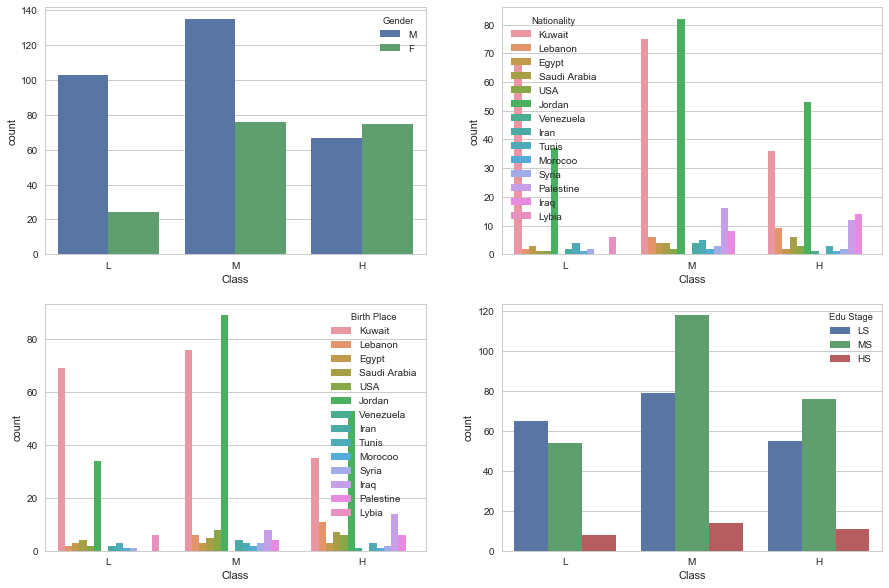

In [35]:
fig, axarr  = plt.subplots(2,2,figsize=(15,10))

sns.countplot(x='Class', data=data, ax=axarr[0,0], hue='Gender', order=['L','M','H'])
sns.countplot(x='Class', data=data, ax=axarr[0,1], hue='Nationality', order=['L','M','H'])
sns.countplot(x='Class', data=data, ax=axarr[1,0], hue='Birth Place', order=['L','M','H'])
sns.countplot(x='Class', data=data, ax=axarr[1,1], hue='Edu Stage', order=['L','M','H'])

- Overall, regardless of gender, nationality, birth place and education stage, middle level performing students constitute the highest proportion among the three classes
- Middle Schoolers have number of middle level performing students

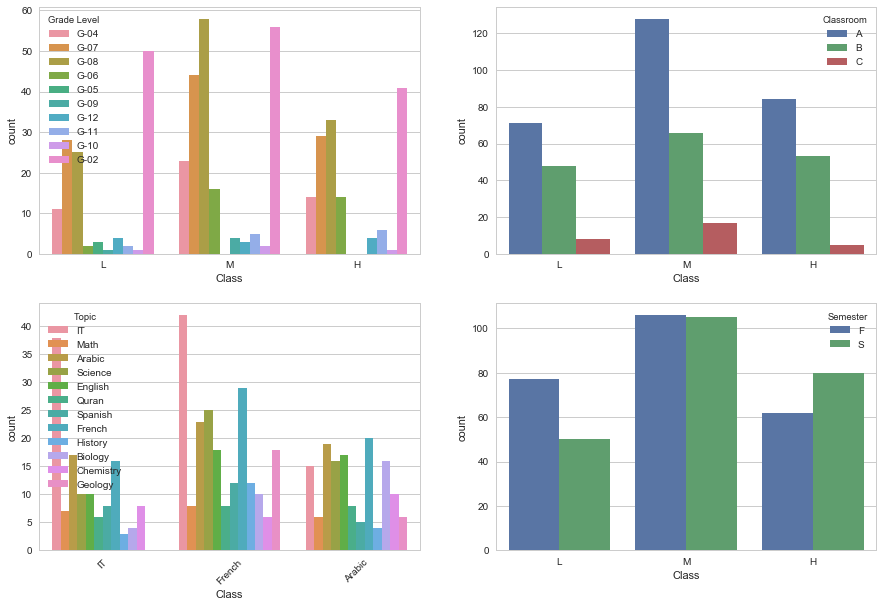

In [36]:
fig, axarr  = plt.subplots(2,2,figsize=(15,10))

sns.countplot(x='Class', data=data, ax=axarr[0,0], hue='Grade Level', order=['L','M','H'])
sns.countplot(x='Class', data=data, ax=axarr[0,1], hue='Classroom', order=['L','M','H'])
sns.countplot(x='Class', data=data, ax=axarr[1,0], hue='Topic', order=['L','M','H'])
sns.countplot(x='Class', data=data, ax=axarr[1,1], hue='Semester', order=['L','M','H'])

axarr[1,0].set_xticklabels(data.Topic.value_counts().index,rotation=45)

- Similar to above, regardless of grade level, classrom, topic of study and semester, middle level performing students constitute the highest proportion among the three classes
- Poorly performing students tend to perform better during the first semester and their scores drop in the second semester
- Middle level performing students perform pretty much the same throughout the year
- More high level students perform better during the second semester

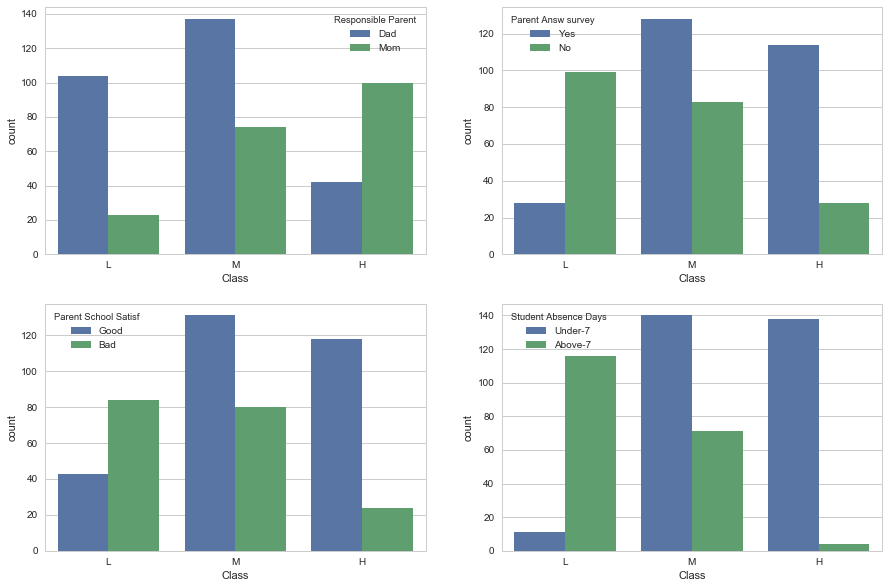

In [37]:
fig, axarr  = plt.subplots(2,2,figsize=(15,10))

sns.countplot(x='Class', data=data, ax=axarr[0,0],hue='Responsible Parent', order=['L','M','H'])
sns.countplot(x='Class', data=data, ax=axarr[0,1], hue='Parent Answ survey', order=['L','M','H'])
sns.countplot(x='Class', data=data, ax=axarr[1,0], hue='Parent School Satisf', order=['L','M','H'])
sns.countplot(x='Class', data=data, ax=axarr[1,1], hue='Student Absence Days', order=['L','M','H'])

- Students whose responsible parent is their mother were more likely to be in middle or high level class
- Students whose parents answered the education surveys were more likely to be in middle or high level class
- Percentage of students whose parents were satistifed with the school(said good) were higher than that of students whose parents responded otherwise
- Considerable proportion of students who were absent from school under 7 days were in middle and high class

#### Point Plots

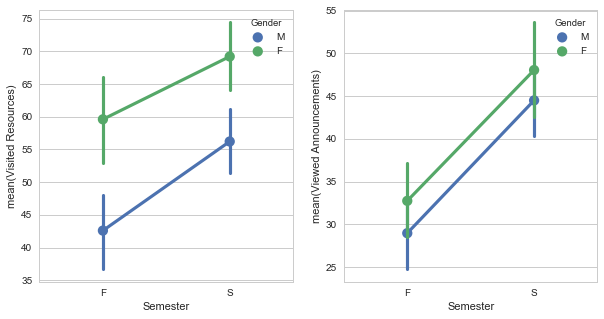

In [38]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='Visited Resources', hue='Gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='Viewed Announcements', hue='Gender', data=data, ax=axis2)

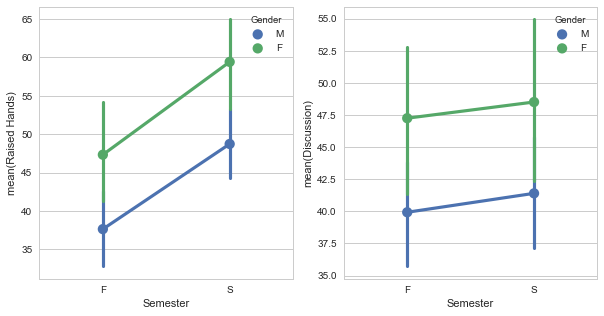

In [39]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='Raised Hands', hue='Gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='Discussion', hue='Gender', data=data, ax=axis2)

- Students tend to visit the resources more, raise more hands, view announcements more and participate in discussions more. This is probably because the second semester is the last chance for them to make up for their falls semester score if they got a poor one
- On all four indicators of educational participation, female students, ov average, scored higher than male students

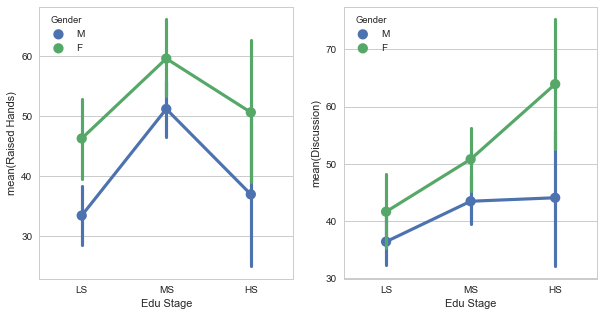

In [40]:
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Edu Stage', y='Raised Hands', hue='Gender', data=data, ax=ax1)
sns.pointplot(x='Edu Stage', y='Discussion', hue='Gender', data=data, ax=ax2)

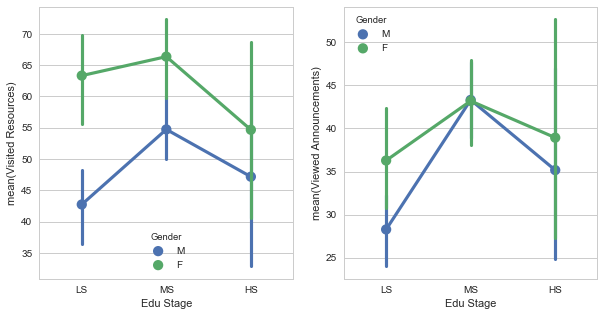

In [41]:
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Edu Stage', y='Visited Resources', hue='Gender', data=data, ax=ax1)
sns.pointplot(x='Edu Stage', y='Viewed Announcements', hue='Gender', data=data, ax=ax2)

- On average, female students score higher on all areas of educational participation regardless of education stage
- Both genders of students raise more hands, visit more resources and view more announcements as they move on to middle school from elementary school but such participation level drops when they go to high school. Only the participation level in discussion groups continues to increase

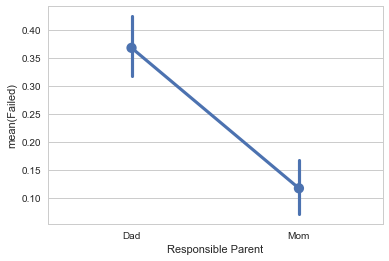

In [42]:
sns.pointplot('Responsible Parent','Failed',data=data)

- Looks like students whose responsible parent was their mother are less likely to receive an "L" in the class column

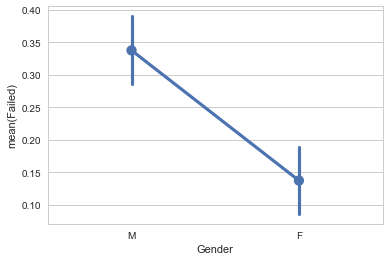

In [43]:
sns.pointplot('Gender','Failed',data=data)

- Looks like female students are less likely to receive an "L" in the class column

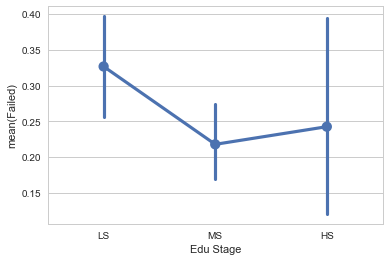

In [44]:
sns.pointplot('Edu Stage','Failed',data=data)

- Students in elementary school were more likely to fail than middle or high school students. Maybe because students accumulate experience on how to achieve higher scores as they move on to middle and high school
- Although middle school and high school students have similar chance of failing, the error bar for high school students are much longer which means polariziation of scores intensify among high school students

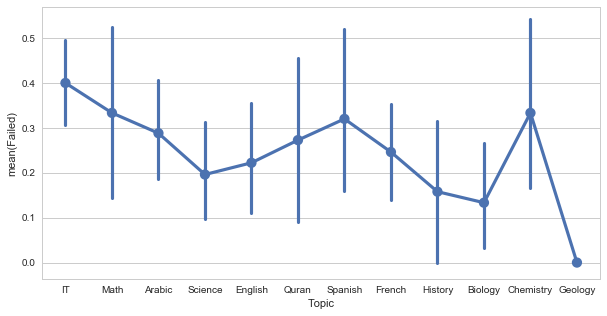

In [45]:
plt.figure(figsize=(10,5))
sns.pointplot('Topic','Failed',data=data)

In [46]:
pd.crosstab(data['Class'],data['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


- No one failed in Geology. Students were less likely to fail in subjects such as Biology and History. On the other hand, students were likely to fail in subjects like IT, Math and Spanish

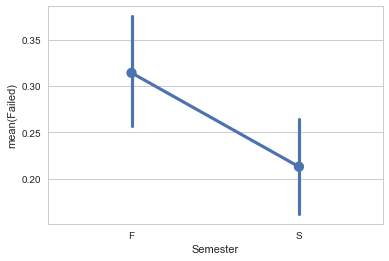

In [47]:
sns.pointplot('Semester','Failed',data=data)

- Students were less likely to fail in the second semester. This matches the fact we found from the countbars above that students tend to participate more actively during the second semester to boost their final grade

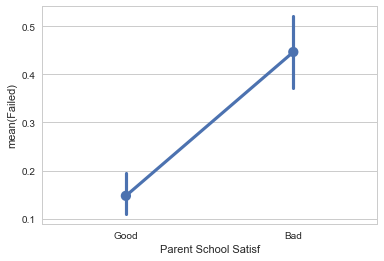

In [48]:
sns.pointplot('Parent School Satisf','Failed',data=data)

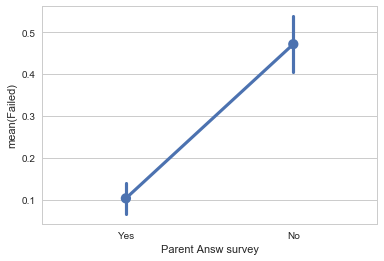

In [49]:
sns.pointplot('Parent Answ survey','Failed',data=data)

- Students who had parents who were more satistifed with the school and answered the survey questions well were considerably less likely to fail

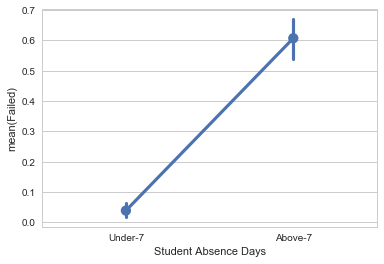

In [50]:
sns.pointplot('Student Absence Days','Failed',data=data)

- Students who were absent from school below seven days were considerably less likely to fail

#### Pair Plot

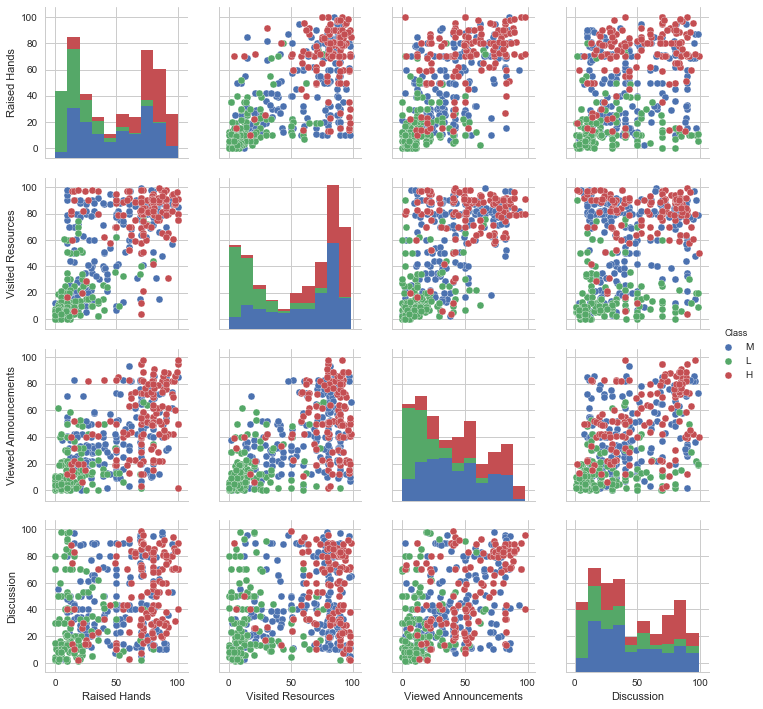

In [51]:
sns.pairplot(data,vars=['Raised Hands', 'Visited Resources', 'Viewed Announcements','Discussion'],hue='Class')

- Looks like high level of "visiting resources" and "raising hands" have pretty strong correlation with receiving high marks

## Encoding Categorical Features

In [52]:
X = data.drop('Class', axis=1)
y = data['Class']

In [53]:
cat_features = X.select_dtypes(include=['object']).columns.values

In [54]:
cat_features

array(['Gender', 'Nationality', 'Birth Place', 'Edu Stage', 'Grade Level',
       'Classroom', 'Topic', 'Semester', 'Responsible Parent',
       'Parent Answ survey', 'Parent School Satisf', 'Student Absence Days'], dtype=object)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
Gender                  480 non-null object
Nationality             480 non-null object
Birth Place             480 non-null object
Edu Stage               480 non-null object
Grade Level             480 non-null object
Classroom               480 non-null object
Topic                   480 non-null object
Semester                480 non-null object
Responsible Parent      480 non-null object
Raised Hands            480 non-null int64
Visited Resources       480 non-null int64
Viewed Announcements    480 non-null int64
Discussion              480 non-null int64
Parent Answ survey      480 non-null object
Parent School Satisf    480 non-null object
Student Absence Days    480 non-null object
Failed                  480 non-null int32
dtypes: int32(1), int64(4), object(12)
memory usage: 62.0+ KB


In [56]:
labelEncoder = LabelEncoder()
# cat_features = X.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_features:
    X[col] = labelEncoder.fit_transform(X[col])

## Splitting Train and Test Data

In [57]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Deciding which classification model to use

In [58]:
keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42)}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)

Results for: Logistic Regression

[[18  0 13]
 [ 0 45  0]
 [13  0 55]]
             precision    recall  f1-score   support

          H       0.58      0.58      0.58        31
          L       1.00      1.00      1.00        45
          M       0.81      0.81      0.81        68

avg / total       0.82      0.82      0.82       144

accuracy is 0.819444444444



Results for: Decision Tree

[[18  0 13]
 [ 0 45  0]
 [ 9  0 59]]
             precision    recall  f1-score   support

          H       0.67      0.58      0.62        31
          L       1.00      1.00      1.00        45
          M       0.82      0.87      0.84        68

avg / total       0.84      0.85      0.84       144

accuracy is 0.847222222222



Results for: Random Forest

[[21  0 10]
 [ 0 45  0]
 [ 5  0 63]]
             precision    recall  f1-score   support

          H       0.81      0.68      0.74        31
          L       1.00      1.00      1.00        45
          M       0.86      0.93      0.89 

## Random Forest Classifier

Random Forest Classifier had the highest classification accuracy, so we'll use it!

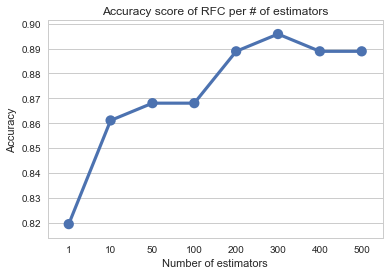

In [59]:
# Exploring the number of estimators in the random forest
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    random_forest_1 = RandomForestClassifier(n_estimators=e, random_state=42)
    pred1 = random_forest_1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
    
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')

RFC works best when the number of estimators is around 200~300

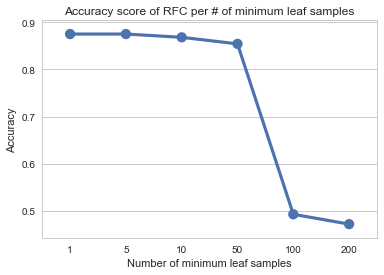

In [60]:
# Exploring minimum leaf samples

score = []
leaf = []
leaf_options = [1, 5, 10, 50, 100, 200]
for i in leaf_options:
    random_forest_2 = RandomForestClassifier(n_estimators=200, random_state=52, min_samples_leaf=i)
    pred2 = random_forest_2.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred2)
    score.append(accuracy)
    leaf.append(i)

plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of minimum leaf samples')

RFC works best when minimum number of leaves is around 50

##### Feature Importance

Additionally, Let's look at feature importance with random forest classifier

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

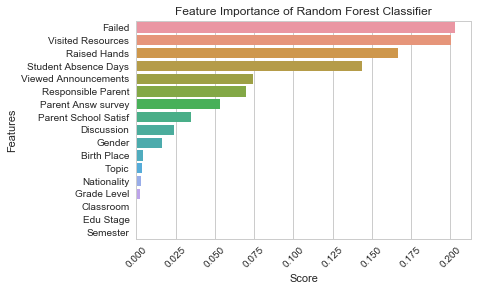

In [61]:
rfc = RandomForestClassifier(n_estimators=250, min_samples_leaf=50, random_state=42)

rfc.fit(X_train, y_train)

dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)

plot = sns.barplot(x='score', y='features', data=df, orient='h')

plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')

plt.setp(plot.get_xticklabels(), rotation=45)

## Gradient Boosting Classifier

Sometimes, Gradient Boosting Classifier can work best for classification problems. We'll try this model just in case

In [62]:
xgb = GradientBoostingClassifier(random_state=42)

xgb_pred = xgb.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("accuracy is "+ str(accuracy_score(y_test, pred)))

[[21  0 10]
 [ 0 45  0]
 [ 8  0 60]]
             precision    recall  f1-score   support

          H       0.72      0.68      0.70        31
          L       1.00      1.00      1.00        45
          M       0.86      0.88      0.87        68

avg / total       0.87      0.88      0.87       144

accuracy is 0.895833333333


## SVC

### Linear SVC

In [63]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=2.0, random_state=42)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.85
             precision    recall  f1-score   support

          H       0.68      0.61      0.64        31
          L       1.00      1.00      1.00        45
          M       0.83      0.87      0.85        68

avg / total       0.85      0.85      0.85       144



#### Non-linear svc

In [64]:
svm_rbf = SVC(kernel='rbf', random_state=42, gamma=2, C=1.0)
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.49
             precision    recall  f1-score   support

          H       0.00      0.00      0.00        31
          L       1.00      0.04      0.09        45
          M       0.48      1.00      0.65        68

avg / total       0.54      0.49      0.33       144



C:\Users\Seungjun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## MLP Classifier

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
mlp = MLPClassifier(solver='lbfgs',alpha=.1,random_state=1)
mlp.fit(X,y)
scores=cross_val_score(mlp,X,y,cv=10)

In [67]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.12)


## Perceptron

In [68]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(n_iter=40, eta0=0.1, random_state=0)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.66
